In [1]:
from numpy.linalg import inv, eig
from numpy.linalg import matrix_rank as rank
from numpy import array, eye, dot, zeros, poly, roots
from functools import reduce
import matplotlib.pyplot as plt
from control import acker, place
import control as ctl
from IPython.display import Image

def mul_mat(*args):
    return reduce(dot, args)

def plota_resp_sist(t, yout):
    
    plt.rcParams["figure.figsize"] = (11,7)
    
    fig, axes = plt.subplots(4, 1)
    ylabels = ["x1", "x1'", "x2", "x2'"]

    for num, ax in enumerate(axes.flatten()):
        ax.axhline(y=0, color='black')
        ax.plot(T, yout[num], color='b')
        ax.set_ylabel(ylabels[num])
        ax.grid()

    fig.tight_layout()
    plt.show()    
    

$$ $$
# Aula 08
$$ $$

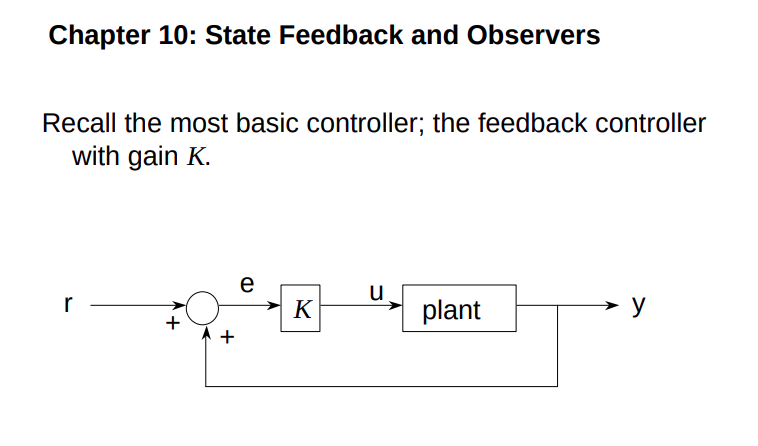

In [2]:
Image('../img/06_01.png')

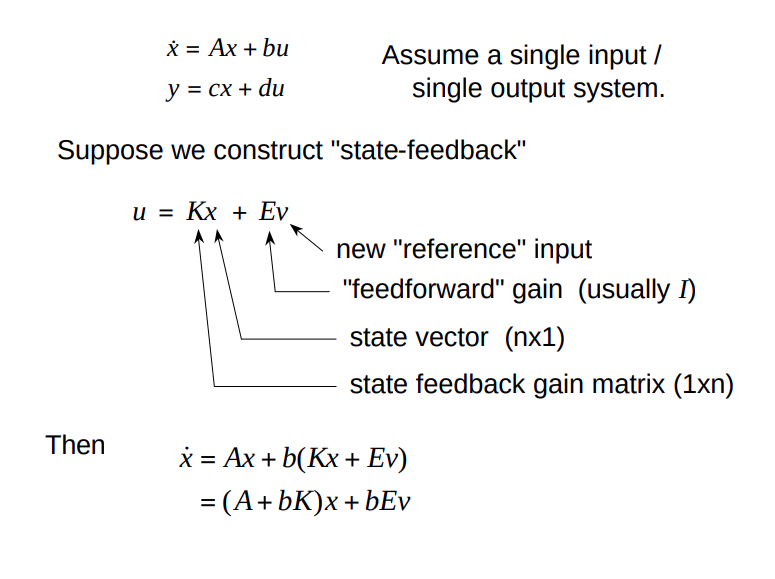

In [3]:
Image('../img/06_02.png')

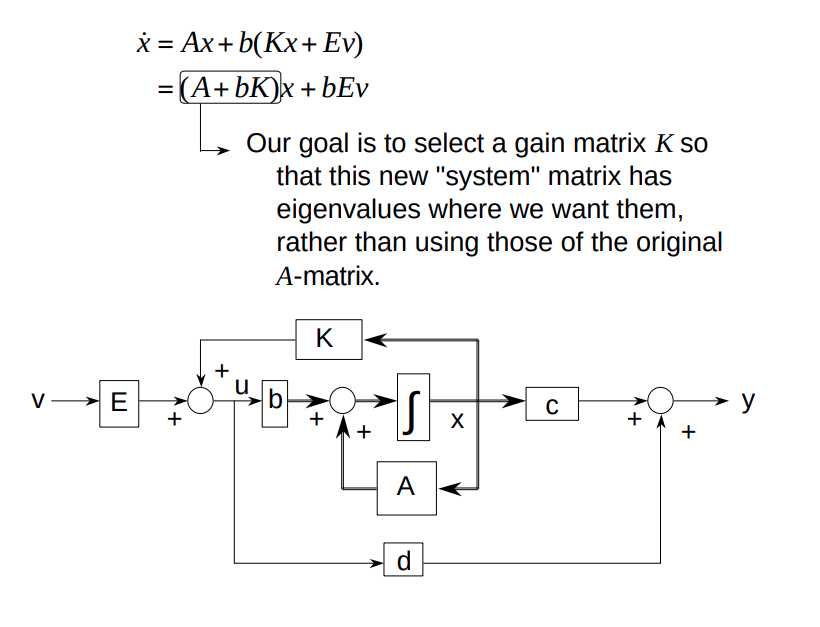

In [4]:
Image('../img/06_03.png')

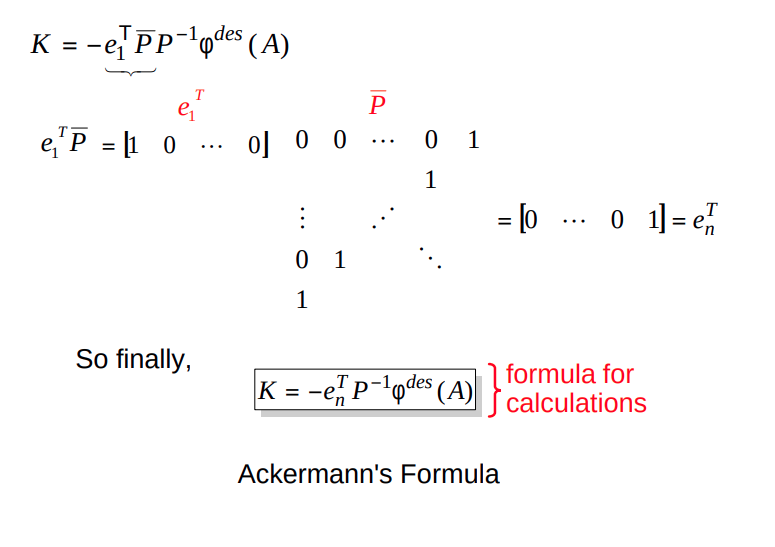

In [5]:
Image('../img/06_04.png')

$$ $$
## Exercício 01

Exercício do slide (*chap10t*).
$$ $$

In [6]:

# matriz dinâmica
A = array([[1, 3],
           [4, 2]])

B = array([1, 1])

# autovalores malha aberta
D, V = eig(A)

D


array([-2.,  5.])

Acima temos um sistema instável com pólos positivos.
$$ $$

In [7]:
poly([-2, 5])

array([  1.,  -3., -10.])

Acima temos polinômio característico da malha aberta. 

Abaixo vemos a demonstração de **cayley hamilton**.
$$ $$

In [8]:
1*dot(A, A) -3*A -10*eye(2)

array([[0., 0.],
       [0., 0.]])

In [9]:

# quero autovalores -5 e -6 
# (obter polinômio característico com essas raízes)
poly([-5, -6])

array([ 1., 11., 30.])

Acima temos o polinômio característico desejado da **MALHA FECHADA**.
$$ $$

In [10]:
# phi desejado -> 1λ^2 + 11λ + 30
phi = array([1, 11, 30])


In [11]:
# matriz controlabilidade sistema
# P = [B  A*B  A*A*B  A*A*A*B] -> n=4
P = array([B, dot(A, B)]).T

P

array([[1, 4],
       [1, 6]])

In [12]:

rank(P)

2

Acima vemos o **rank cheio**, logo o sistema é **controlável**.
$$ $$

In [13]:
# en é vetor unitário da ordem da matriz
# n=1 -> [1]
# n=2 -> [0, 1]
# n=3 -> [0, 0, 1]
en = array([0, 1])

P_1 = inv(P)

phi_des = 1*dot(A,A) +11*A + 30*eye(2)

K = -mul_mat(en, P_1, phi_des)

K

array([ -1., -13.])

$$ $$
## Exercício 02

Sistema eletro-mecânico para controlar a altura de uma bolinha de metal ao ar livre.
$$ $$

In [14]:
A = array([[0,   1,    0],
           [980, 0, -2.8],
           [0,   0, -100]])

B = array([0, 0, 100])

C = array([1, 0, 0])

D, V = eig(A)

D.round(3)


array([  31.305,  -31.305, -100.   ])

Acima vemos que o sistema é instável.
$$ $$

In [15]:
# ATENÇÃO para transpo-la
P = array([B, mul_mat(A, B), mul_mat(A, A, B)]).T

P

array([[ 0.0e+00,  0.0e+00, -2.8e+02],
       [ 0.0e+00, -2.8e+02,  2.8e+04],
       [ 1.0e+02, -1.0e+04,  1.0e+06]])

In [16]:
rank(P)

3

Rank cheio, logo o sistema é **controlável**.
$$ $$

In [17]:
en = array([0, 0, 1])

P_1 = inv(P)


$$ $$
Nesse problema já é conhecido os pólos desejados que serão alocados para obter malha fechada:
    
$$ p_{1}=-10+10j$$
$$ p_{2}=-10-10j$$
$$ p_{3}=-50$$

In [18]:
p1 = -10 + 10j
p2 = -10 - 10j
p3 = -50

phi = poly([p1, p2, p3])

phi

array([1.0e+00, 7.0e+01, 1.2e+03, 1.0e+04])

Temos o seguinte polinômio característico:
    
$$ 1\lambda^3+70\lambda^2+1200\lambda+10000=0$$    

$$ $$

In [19]:
phi_desA = 1*mul_mat(A,A,A) + 70*mul_mat(A,A) + 1200*A + 1e4*eye(3)

phi_desA

array([[ 7.8600e+04,  2.1800e+03,  8.4000e+01],
       [ 2.1364e+06,  7.8600e+04, -1.4504e+04],
       [ 0.0000e+00,  0.0000e+00, -4.1000e+05]])

In [20]:

# como no exe ele faz (A - B*K) o sinal (-) não aparece
K = mul_mat(en, P_1, phi_desA)

K


array([-280.71428571,   -7.78571429,   -0.3       ])

Acima temos o ganho desejado. Abaixo fazemos essa verificação.
$$ $$

In [21]:
# B modificada (mesmo valores com organização diferente)
B2 = array([[0], [0], [100]])

res = A - dot(B2, [K])

D, V = eig(res)

D.round()

array([-10.+10.j, -10.-10.j, -50. +0.j])

$$ $$

Acima obtemos os pólos p1, p2 e p3 alocados!

$$ $$

Assim é obtida a lei de controle, estados (x1, x2, x3):

$$ u = -280.7*Dh -7.78*\dot{Dh} - 0.3*DI $$

$$ $$

Abaixo temos outros métodos para cálculo do ganho:

$$ $$

In [22]:
polos = array([p1, p2, p3])
K1 = acker(A, B2, polos)

K1

matrix([[-280.71428571,   -7.78571429,   -0.3       ]])

In [23]:

K2 = place(A, B2, polos)

K2

matrix([[-280.71428571,   -7.78571429,   -0.3       ]])

In [24]:

# matriz de observabilidade
O = array([C, mul_mat(C,A), mul_mat(C,A,A)])

O

array([[  1. ,   0. ,   0. ],
       [  0. ,   1. ,   0. ],
       [980. ,   0. ,  -2.8]])

In [25]:
rank(O)

3

In [26]:
C

array([1, 0, 0])

$$ $$
Acima, pelo rank cheio de $O$, é possivel dizer que com apenas o **estado 01** consigo controlar o sistema, pois obtenho/estimo os estados 2 e 3 sendo ele observável.

Se não tenho os estados é necessário fazer o projeto do observador e do controlador.